<h1 style="color: #00000; text-align:center; font-size: 30px;"><b style="color:#D93232">Yelp</b> API Analysis Project</h1>
<h2 style="color: #00000; text-align:center; font-size: 30px;">Pizza Businesses in New York</h2>







![restaurant counter with pizza](pizza_image_001.jpg)

Photo by <a href="https://unsplash.com/@gogofoto?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Kelvin T</a> on <a href="https://unsplash.com/s/photos/pizza?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

<h2><b>Task: Query Yelp for All Businesses in a Category and Analyze the Results</b></h2>

Write a query of businesses on Yelp, then use *pagination* to retrieve all possible results for that query. Then you will pre-process and analyze your data, leading to a presentation of your findings.


# Table of Content

### 1. Importing Libraries

Importing the require libraries for this analysis.


### 2. Make the Initial Request

Start by filling in your API key to make the initial request to the business search API. 


### 3. Add Pagination

Using loops and functions, collect the maximum number of results for your query from the API.

### 4. Prepare Data

Investigate the structure of the response you get back and extract the relevant information.

### 5. Perform Descriptive Analysis

Interpret visualizations related to the price range, average rating, and number of reviews for all query results.


<h2 style="color: #D93232"> 1. Importing Libraries </h2>
<hr style="height: 0.8px; border: 0; background-color: #808080;">
<p style="font-size: 15px"><b>Libraries:</b></p>
<p> 1. Library <b>pandas</b> will be required to work with data in tabular representation.</p>
<p> 2. Library <b>request</b> will be required to make initial request with the Yelp API Key.</p>
<p> 3. Library <b>matplotlib, seaborn</b> will be required for data visualization</p>
<p> 4. Library <b>folium</b> will be required to create a map to display the location and information of the data retrieved.</p>

In [1]:
import pandas as pd
import requests
import folium
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<h2 style="color: #D93232"> 2. Make the Initial Request </h2>
<hr style="height: 0.8px; border: 0; background-color: #808080;">
<p>I made an initial request to the Yelp API. In this search it must take at least 2 parameters, I based them on pizza as the <b>term</b> and New York, NY as the <b>location</b> during this search.</p>
<br >
<p style="color: #D93232; font-size: 16px;"><b>2.1 Querying</b> </p>

In [2]:
api_key = ''

# Two param called term and location will be required in my analysis
term = 'pizza'
location = 'New York NY'

# Set up params for request
url = "https://api.yelp.com/v3/businesses/search"
headers = {
    "Authorization": "Bearer {}".format(api_key)
}
url_params = {
    "term": term.replace(" ", "+"),
    "location": location.replace(" ", "+")
}

# Make the request using requests.get, passing in
# url, headers=headers, and params=url_params
response = requests.get(url, headers=headers, params=url_params)

# Confirm we got a 200 response
response

<Response [200]>

In [3]:
# Get the response body in JSON format
response_json = response.json()

In [4]:
# View the keys
response_json.keys()

dict_keys(['businesses', 'total', 'region'])

<p style="color: #D93232; font-size: 16px;"><b>2.2 Extracting the Data</b> </p>
<p>Now, retrieve the value associated with the <b>businesses</b> key, and inspect its contents.</p>

In [5]:
# Retrieve the value from response_json
businesses = response.json()['businesses']

In [6]:
# View number of records
print(f"There are {len(businesses)} businesses in this response")

There are 20 businesses in this response


In [7]:
# View the first 2 records
businesses[:2]

[{'id': 'zj8Lq1T8KIC5zwFief15jg',
  'alias': 'prince-street-pizza-new-york-2',
  'name': 'Prince Street Pizza',
  'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/ZAukOyv530w4KjOHC5YY1w/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/prince-street-pizza-new-york-2?adjust_creative=SWP0UOPENJo2i_oj-dhN2g&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=SWP0UOPENJo2i_oj-dhN2g',
  'review_count': 3934,
  'categories': [{'alias': 'pizza', 'title': 'Pizza'},
   {'alias': 'italian', 'title': 'Italian'}],
  'rating': 4.5,
  'coordinates': {'latitude': 40.72308755605564,
   'longitude': -73.99453001177575},
  'transactions': ['delivery', 'pickup'],
  'price': '$',
  'location': {'address1': '27 Prince St',
   'address2': None,
   'address3': '',
   'city': 'New York',
   'zip_code': '10012',
   'country': 'US',
   'state': 'NY',
   'display_address': ['27 Prince St', 'New York, NY 10012']},
  'phone': '+12129664100',
  'display_phone': '(212) 966-4100'

<h2 style="color: #D93232"> 3. Add Pagination </h2>
<hr style="height: 0.8px; border: 0; background-color: #808080;">
<p>Finding how to request as many pages as possible.</p>
<br >
<p style="color: #D93232; font-size: 16px;"><b>Technical Details</b></p>

Returning to the Yelp API, the [documentation](https://www.yelp.com/developers/documentation/v3/business_search) also provides us details regarding the **API limits**. These often include details about the number of requests a user is allowed to make within a specified time limit and the maximum number of results to be returned. In this case, we are told that any request has a **maximum of 50 results per request** and defaults to 20. Furthermore, any search will be limited to a **total of 1000 results**. To retrieve all 1000 of these results, we would have to page through the results piece by piece, retrieving 50 at a time. Processes such as these are often referred to as pagination.

Also, be mindful of the **API** ***rate*** **limits**. You can only make **5000 requests per day** and are also can make requests too fast. Start prototyping small before running a loop that could be faulty. You can also use `time.sleep(n)` to add delays. For more details see https://www.yelp.com/developers/documentation/v3/rate_limiting.

<p>In this part I will define a search and then paginate over the results to retrieve all of the results. I will then parse these responses as a list of dictionaries (for further exploration) and create a map using Folium to visualize the results geographically.</p>
<br >
<p style="color: #D93232; font-size: 16px;"><b>3.1 Determining the Total</b></p>
<p>Depending on the number of total results for your query, you will either retrieve all of the results, or just the first 1000 (if there are more than 1000 total).</p>

<p>To find the total number of results I used the <b>total</b> key:<p>

In [8]:
# Finding the total number of results
total_number_of_results = response_json["total"]
print("There are " + str(total_number_of_results)  + " results")

There are 11800 results


In [9]:
# Since that there are more than a 1000 results I will set total limit to 1000 only
total = 1000

<p style="color: #D93232; font-size: 16px;"><b>3.2 Calculating the Offsets</b></p>

<p>The documentation states in the parameters section:</p>

> **Name**: `limit`, **Type:** int, **Description:** Optional. Number of business results to return. By default, it will return 20. Maximum is 50.

> **Name**: `offset`, **Type:** int, **Description:** Optional. Offset the list of returned business results by this amount.

So, to get the most results with the fewest API calls we want to set a limit of 50 every time. If, say, we wanted to get 210 total results, that would mean:

1. Offset of `0` (first 50 records)
2. Offset of `50` (second 50 records)
3. Offset of `100` (third 50 records)
4. Offset of `150` (fourth 50 records)
5. Offset of `200` (final 10 records)

<p>In the cell below, I created a function called <b>get_offsets</b> that takes in a total and returns a list of offsets for that total. You can assume that there is a limit of 50 every time.</p>

In [10]:
# Get a list of offsets needed to get all pages of data up until the total
def get_offsets(total):
    offset_list = []
    max_records = 50
    a = total - (total % max_records)
    h = total % max_records
    if (total % max_records) != 0:
        for i in range(0, int(a/max_records+1)):
            offset = i * max_records
            offset_list.append(offset)
        return offset_list
    else:
        for i in range(int(a/max_records)):
            offset = i * max_records
            offset_list.append(offset)
        return offset_list

In [11]:
# To check that my offset function is working
assert get_offsets(200) == [0, 50, 100, 150]
assert get_offsets(210) == [0, 50, 100, 150, 200]

<p style="color: #D93232; font-size: 16px;"><b>3.3 Putting it all together</b></p>

<p>Lets check what the <b>URL_Param</b> outputs from the variable we assigned previously</p>

In [12]:
# Checking what the URL_Params displays
url_params

{'term': 'pizza', 'location': 'New+York+NY'}

In [13]:
# I specified that the limit should be 50 every time:
url_params["limit"] = 50

<p>In order to modify the offset, I will need to add it to <b>url_params</b> with the key <b>offset</b> and whatever value is needed.</p>

<p>In the cell below, I will need to write code that:</p>

1. Creates an empty list for the full prepared dataset
2. Loops over all of the offsets from get_offsets and makes an API call each time with the specified offset
3. Extends the full dataset list with each query's dataset

In [14]:
full_dataset = []

for offset in get_offsets(total):
    url_params.update( {'offset' : offset} )
    response = requests.get(url, headers=headers, params=url_params)
    response_json = response.json()
    businesses = response.json()['businesses']
    full_dataset.extend(businesses)

# Check the length of the full dataset. It will be up to `total`,
# potentially less if there were missing values
len(full_dataset)

1000

This code may take up to a few minutes to run.

If you get an error trying to get the response body in JSON format, try adding <b>`time.sleep(1)`</b> right after the <b>`requests.get`</b> line, so your code will sleep for 1 second between each API call.

<b>CONCLUSION:</b> I have created my dataset called `full_dataset` in a list with a 1000 records 

<h2 style="color: #D93232"> 4. Prepare Data </h2>
<hr style="height: 0.8px; border: 0; background-color: #808080;">
<p>Now that I have all of my data, it will be prepared for analysis. I will start this process by inspecting the raw data.</p>
<br >

In [15]:
# View the first 2 records
full_dataset[:2]

[{'id': 'zj8Lq1T8KIC5zwFief15jg',
  'alias': 'prince-street-pizza-new-york-2',
  'name': 'Prince Street Pizza',
  'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/ZAukOyv530w4KjOHC5YY1w/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/prince-street-pizza-new-york-2?adjust_creative=SWP0UOPENJo2i_oj-dhN2g&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=SWP0UOPENJo2i_oj-dhN2g',
  'review_count': 3934,
  'categories': [{'alias': 'pizza', 'title': 'Pizza'},
   {'alias': 'italian', 'title': 'Italian'}],
  'rating': 4.5,
  'coordinates': {'latitude': 40.72308755605564,
   'longitude': -73.99453001177575},
  'transactions': ['delivery', 'pickup'],
  'price': '$',
  'location': {'address1': '27 Prince St',
   'address2': None,
   'address3': '',
   'city': 'New York',
   'zip_code': '10012',
   'country': 'US',
   'state': 'NY',
   'display_address': ['27 Prince St', 'New York, NY 10012']},
  'phone': '+12129664100',
  'display_phone': '(212) 966-4100'

This function `prepare_data` that takes in a list of dictionaries like `businesses` and returns a copy that has been prepared for analysis.

The final keys for each dictionary should be `name`, `review_count`, `rating`, `price`, `latitude`, and `longitude`.

In [16]:
# This function takes in a list of dictionaries and prepares it for analysis

def prepare_data(data_list):
    results = []
    
    for business_data in data_list:
        prepared_data = {}
        for key, value in business_data.items():
            if 'name' not in business_data:
                prepared_data['name'] = 'None'
            elif 'name' in str(key):
                prepared_data[key] = value
            if 'price' not in business_data:
                prepared_data['price'] = 'None'
            elif 'price' in str(key):
                prepared_data[key] = value
            if 'rating' not in business_data:
                prepared_data['rating'] = 'None'
            elif 'rating' in str(key):
                prepared_data[key] = value
            if 'review_count' not in business_data:
                prepared_data['review_count'] = 'None'
            elif 'review_count' in str(key):
                prepared_data[key] = value
        for key, value in business_data.items():
            if key == 'coordinates':
                for keyTwo, valueTwo in value.items():
                    if 'latitude' not in value:
                        prepared_data['latitude'] = 'None'
                    elif 'latitude' in str(keyTwo):
                        prepared_data[keyTwo] = valueTwo
                    if 'longitude' not in value:
                        prepared_data['longitude'] = 'None'
                    elif 'longitude' in str(keyTwo):
                        prepared_data[keyTwo] = valueTwo
        if all(prepared_data.values()):
            results.append(prepared_data)

    return results
    
# Test out function
prepared_businesses = prepare_data(full_dataset[:total])
prepared_businesses[:total]

[{'name': 'Prince Street Pizza',
  'review_count': 3934,
  'rating': 4.5,
  'price': '$',
  'latitude': 40.72308755605564,
  'longitude': -73.99453001177575},
 {'name': "Juliana's",
  'review_count': 2338,
  'rating': 4.5,
  'price': '$$',
  'latitude': 40.70274718768062,
  'longitude': -73.99343490196397},
 {'name': "Lombardi's Pizza",
  'review_count': 6180,
  'rating': 4.0,
  'price': '$$',
  'latitude': 40.7215934960083,
  'longitude': -73.9955956044561},
 {'name': 'Lucali',
  'review_count': 1697,
  'rating': 4.0,
  'price': '$$',
  'latitude': 40.6818,
  'longitude': -74.00024},
 {'name': 'Rubirosa',
  'review_count': 2418,
  'rating': 4.5,
  'price': '$$',
  'latitude': 40.722766,
  'longitude': -73.996233},
 {'name': "Roberta's",
  'review_count': 2992,
  'rating': 4.0,
  'price': '$$',
  'latitude': 40.70493,
  'longitude': -73.93399},
 {'name': "L'industrie Pizzeria",
  'review_count': 584,
  'rating': 4.5,
  'price': '$',
  'latitude': 40.71162,
  'longitude': -73.95783},
 {

In the below code is to check if my function created the correct keys:

In [17]:
assert sorted(list(prepared_businesses[0].keys())) == ['latitude', 'longitude', 'name', 'price', 'rating', 'review_count']

The following code will differ depending on the query, but there may be fewer results in the prepared list than in the full dataset (if any of them were missing data):

In [18]:
print("Original:", len(full_dataset))
print("Prepared:", len(prepared_businesses))

Original: 1000
Prepared: 1000


<p style="color: #D93232; font-size: 16px;"><b>Creating a Dataframe</b></p>
<p>Creating a DataFrame to hold the data - this will make my cleaning and analysis easier.</p>

In [19]:
# Create DataFrame from prepared business data
business_df = pd.DataFrame(prepared_businesses, columns = ['name', 'price', 'rating', 'review_count', 'latitude', 'longitude',])

In [20]:
# Inspect the DataFrame
business_df.head()

,name,price,rating,review_count,latitude,longitude
0,Prince Street Pizza,$,4.5,3934,40.723088,-73.994530
1,Juliana's,$$,4.5,2338,40.702747,-73.993435
2,Lombardi's Pizza,$$,4.0,6180,40.721593,-73.995596
3,Lucali,$$,4.0,1697,40.681800,-74.000240
4,Rubirosa,$$,4.5,2418,40.722766,-73.996233


To make analysis of prices easier, let's convert `price` to a numeric value indicating the number of dollar signs.

In [21]:
# Convert price to numeric
business_df['price'] = business_df['price'].str.len()
business_df.head()

,name,price,rating,review_count,latitude,longitude
0,Prince Street Pizza,1,4.5,3934,40.723088,-73.994530
1,Juliana's,2,4.5,2338,40.702747,-73.993435
2,Lombardi's Pizza,2,4.0,6180,40.721593,-73.995596
3,Lucali,2,4.0,1697,40.681800,-74.000240
4,Rubirosa,2,4.5,2418,40.722766,-73.996233


<b>CONCLUSION:</b> I have cleaned the dataset to only extract the information I need for this analysis.

<h2 style="color: #D93232"> 5. Perform Descriptive Analysisn </h2>
<hr style="height: 0.8px; border: 0; background-color: #808080;">
<p style="color: #D93232; font-size: 16px;"><b>5.1 Descriptive Statistics</b></p>
<pTaking the businesses from the previous question and I did an initial descriptive analysis. Calculate summary statistics for the review counts, average rating, and price.</p>

In [22]:
# Calculate summary statistics for the review counts, average rating, and price
statistic_summary = business_df.describe()
statistic_summary

,price,rating,review_count,latitude,longitude
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.139000,3.998000,343.166000,40.716927,-73.995846
std,1.108561,0.505224,589.938086,0.308201,0.753366
min,1.000000,1.000000,1.000000,31.086427,-97.753939
25%,1.000000,3.500000,49.000000,40.703169,-73.995358
50%,2.000000,4.000000,159.000000,40.727080,-73.981652
75%,3.000000,4.500000,376.000000,40.754504,-73.954983
max,4.000000,5.000000,6180.000000,40.964705,-73.687280


In [23]:
# Checking for if business_df contains anymore null values
checking_for_null = business_df.isnull().sum()
checking_for_null

name            0
price           0
rating          0
review_count    0
latitude        0
longitude       0
dtype: int64

In [24]:
# Checking how many duplicates are in business_df
checking_for_duplicates = business_df.duplicated().sum()
print("There are " + str(checking_for_duplicates) + " duplicate in the clean business data")

There are 1 duplicate in the clean business data


In [25]:
# Calculating the Mean, Median, Mode and Standard Deviation for review counts, average rating, and price.

# Review Counts Statistic Summary
mean_review_count = business_df['review_count'].mean()
median_review_count = business_df['review_count'].median()
std_review_count = business_df['review_count'].std()

print("Review Count:")
print("Mean: " + str(mean_review_count) + " " + "Median: " + str(median_review_count) + " " + " Standard Deviation: " + \
      str(std_review_count))
print()
# Average Rating Statistic Summary
mean_average_rating = business_df['rating'].mean()
median_average_rating = business_df['rating'].median()
std_average_rating = business_df['rating'].std()

print("Average Rating:")
print("Mean: " + str(mean_average_rating) + " " + "Median: " + str(median_average_rating) + " " + " Standard Deviation: " + \
      str(std_average_rating))
# Price Statistic Summary
mean_price = business_df['price'].mean()
median_price = business_df['price'].median()
std_price = business_df['price'].std()
print()
print("Price:")
print("Mean: " + str(mean_price) + " " + "Median: " + str(median_price) + " " + " Standard Deviation: " + \
      str(std_price))

Review Count:
Mean: 343.166 Median: 159.0  Standard Deviation: 589.9380860644525

Average Rating:
Mean: 3.998 Median: 4.0  Standard Deviation: 0.5052239614777295

Price:
Mean: 2.139 Median: 2.0  Standard Deviation: 1.1085611881659496


From the descriptive statistics summary I base my analysis on the following factors:
- mean
- median
- standard deviation
- min & max

<h2>Review Count</h2>
<p>The <b>mean</b> for Review Counts is: 343.166000</p>
<p>The <b>median</b> for Review Counts is: 159.0</p>
<p>The <b>standard deviation</b> for Review Counts is: 589.9380860644525</p>
<p>The <b>minimum</b> review counts for pizza business in New York, NY was 1</p>
<p>The <b>maximum</b> review counts for pizza business in New York, NY was 6180</p>
<br >
<h2>Rating</h2>
<p>The <b>mean</b> for Rating is: 3.998 </p>
<p>The <b>median</b> for Rating is: 4.0</p>
<p>The <b>standard deviation</b> for Rating is: 0.5052239614777295</p>
<p>The <b>minimum</b> Rating for pizza business in New York, NY was given a rating of 1</p>
<p>The <b>maximum</b> Rating for pizza business in New York, NY was given a rating of 5</p>
<br >
<h2>Price</h2>
<p>The <b>mean</b> for Price is: 2.139</p>
<p>The <b>median</b> for Price is: 2.0</p>
<p>The <b>standard deviation</b> for Price is: 1.1085611881659496</p>
<p>The <b>minimum</b> price for a pizza in New York, NY is 1 dollar signs</p>
<p>The <b>maximum</b> price for a pizza in New York, NY is 4 dollar signs</p>
<br >
<p>Also based on the analysis above it has shown that there was no nulls contain the prepared_business data that I have
extracted. This is because all nulls were replace with a there respective key and value of "None".</p>

<p>Also based on the analysis there was 1 duplicates in the prerpared_business data.</p>

<p style="color: #D93232; font-size: 16px;"><b>5.2 Data Visualisation</b></p>

### Distribution of number of reviews per business

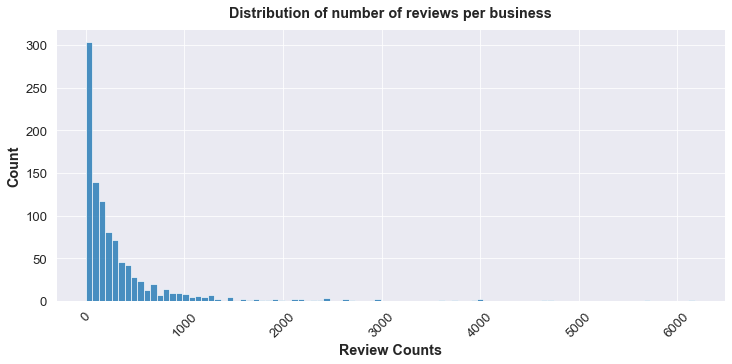

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Plot distribution of number of reviews per business
plt.figure(figsize=(12,5))
sns.set_style("darkgrid")
sns.set_context('paper', font_scale = 1.5)
sns.histplot(business_df['review_count'], alpha=0.8, palette = 'coolwarm')
plt.xticks(rotation=45)
plt.title('Distribution of number of reviews per business',  weight='bold', pad=12)
plt.xlabel('Review Counts', weight='bold')
plt.ylabel('Count', weight='bold')
plt.show()

### Distribution of ratings across businesses

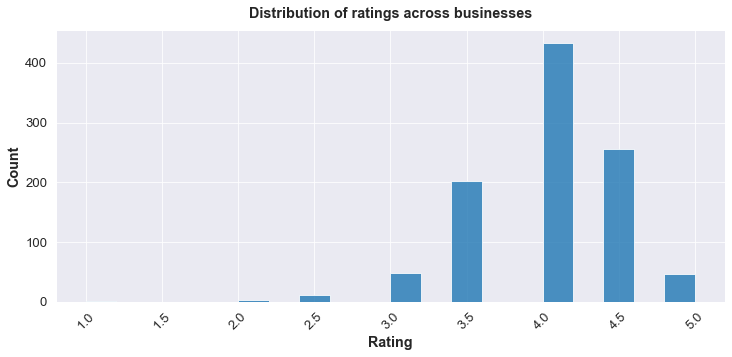

In [27]:
# Plot distribution of ratings across businesses
plt.figure(figsize=(12,5))
sns.set_style("darkgrid")
sns.set_context('paper', font_scale = 1.5)
sns.histplot(business_df['rating'], alpha=0.8, palette = 'coolwarm')
plt.xticks(rotation=45)
plt.title('Distribution of ratings across businesses', weight='bold', pad=12)
plt.xlabel('Rating', weight='bold')
plt.ylabel('Count', weight='bold')
plt.show()

### Distribution of prices across businesses

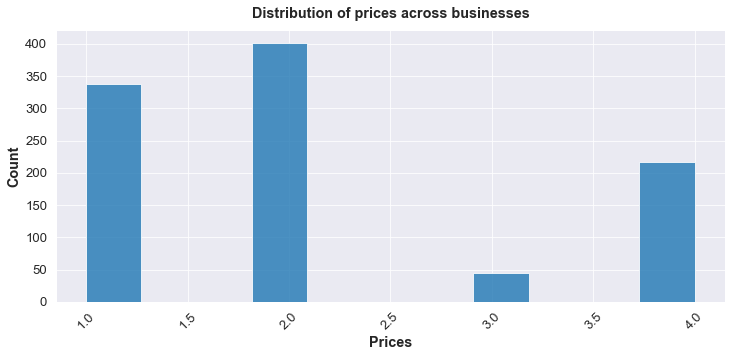

In [28]:
# Plot distribution of prices across businesses
plt.figure(figsize=(12,5))
sns.set_style("darkgrid")
sns.set_context('paper', font_scale = 1.5)
sns.histplot(business_df['price'], alpha=0.8, palette = 'coolwarm')
plt.xticks(rotation=45)
plt.title('Distribution of prices across businesses', weight='bold', pad=12)
plt.xlabel('Prices', weight='bold')
plt.ylabel('Count', weight='bold')
plt.show()

<h4>Distribution of number of reviews per busines:</h4>

<p>The distribution of this graph is positively skewed more towards the right.</p>

<h4>Distribution of ratings across businesses:</h4>

<p>The distribution of this graph is negatively skewed to the left.</p>

<h4>Distribution of prices across businesses:</h4>

<p>From the graph shown above the data is not distributed normally.</p>

### Rating vs. Price

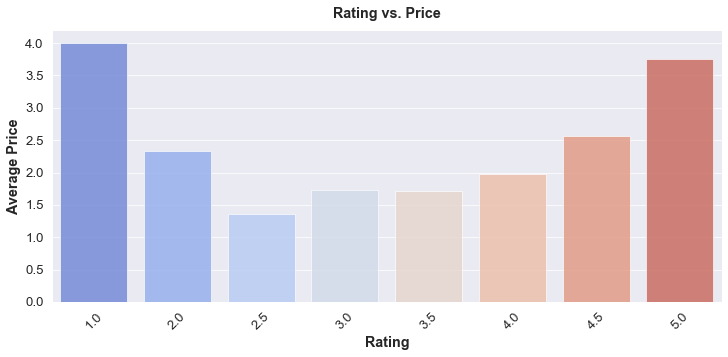

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Calculate average price for each rating
rating_price = business_df.groupby('rating').agg({'price': 'mean'})
list_rating_price_index = list(rating_price.index)
list_rating_price_value = list(rating_price['price'])

plt.figure(figsize=(12,5))
sns.set_style("darkgrid")
sns.set_context('paper', font_scale = 1.5)
sns.barplot(x=list_rating_price_index, y=list_rating_price_value, alpha=0.8, palette = 'coolwarm')
plt.xticks(rotation=45)
plt.title('Rating vs. Price',  weight='bold', pad=12)
plt.xlabel('Rating', weight='bold')
plt.ylabel('Average Price',  weight='bold')
plt.show()

<h2 style="color: #D93232; font-size: 16px;">Is a higher price associated with a higher rating?</h2>

From the graph shown above the histogram plots have more of a Symmetric U shape distribution.

I think that there are other factors that could be affecting the price and the rating.

For an example the quality of the pizza per business that could affect the rating and price.

### Ratings vs Review Counts

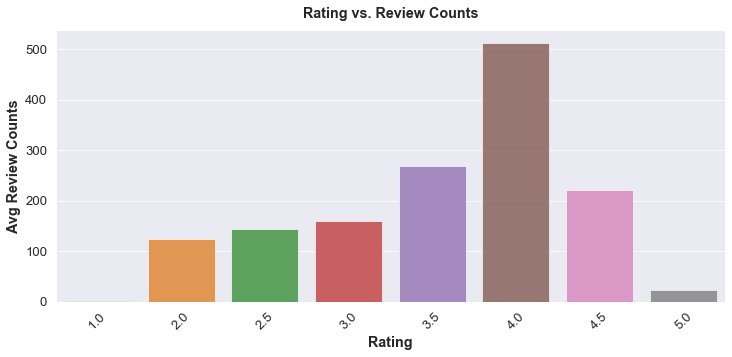

In [31]:
# Calculate average review count for each rating
rating_review_count = business_df.groupby('rating').agg({'review_count': 'mean'})

plt.figure(figsize=(12,5))
sns.set_style("darkgrid")
sns.set_context('paper', font_scale = 1.5)
sns.barplot(x=list(rating_review_count.index), y=list(rating_review_count['review_count']), alpha=0.8)
plt.xticks(rotation=45)
plt.title('Rating vs. Review Counts', weight='bold', pad=12)
plt.xlabel('Rating', weight='bold')
plt.ylabel('Avg Review Counts', weight='bold')
plt.show()

<h2 style="color: #D93232; font-size: 16px;">Is a higher number of reviews associated with a higher rating?</h2>

From the graph plotted above, I can say the data plotted is slighlty negatively skewed to the left.

I think there is some relationship in the plotted graph.

A rating of 4 have high review counts than other rating.

### Folium Map

In [32]:
# Import the library
import folium
import numpy as np
import pandas as pd

# Set up center latitude and longitude
center_lat = 40.7128
center_long = -74.0060

# Initialize map with center lat and long
yelp_map = folium.Map([center_lat, center_long], zoom_start=13)

# Adjust this limit to see more or fewer businesses
limit= 200

for business in full_dataset[:limit]:
    # Extract information about business
    name = business['name']
    rating = business['rating']
    if 'price' not in business:
        business.update( {'price' : 'None'} )
    price = business['price']
    center_lat = [business['coordinates']['latitude']]
    center_long = [business['coordinates']['longitude']]
    points = list(zip(center_lat, center_long))
    for p in points:
        center_lat = p[0]
        center_long = p[1]
    details = "{} Price: {} Rating:{}".format(name,price,rating)
    
    # Create popup with relevant details
    popup = folium.Popup(details, parse_html=True)
    
    # Create marker with relevant lat/long and popup
    marker = folium.Marker(location=[center_lat, center_long],icon=folium.Icon(color="red", icon="glyphicon glyphicon-cutlery"),popup=popup)
    
    marker.add_to(yelp_map)
yelp_map